## Magic Keywords
Magic keywords are special commands you can run in cells that let you control the notebook itself or perform system calls such as changing directories. For example, you can set up matplotlib to work interactively in the notebook with `%matplotlib`.

Magic commands are preceded with one or two percent signs `(% or %%)` for line magics and cell magics, respectively. Line magics apply only to the line the magic command is written on, while cell magics apply to the whole cell.

**NOTE:** These magic keywords are specific to the normal Python kernel. If you are using other kernels, these most likely won't work.

### Timing code
At some point, you'll probably spend some effort optimizing code to run faster. Timing how quickly your code runs is essential for this optimization. You can use the `timeit` magic command to time how long it takes for a function to run, like so:

In [1]:
from math import sqrt

def fibon(n):  # Recursive Fibonnacci
    if n <= 1:
        return n
    
    return fibon(n-1) + fibon(n-2)

def fibon2(n):  # Closed form Fibonacci
    return ((1+sqrt(5)) ** n-(1-sqrt(5)**n) / (2**n*sqrt(5)))

In [2]:
# Let's use the timeit magic command

%timeit fibon(20)

4.03 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
# Let's use the timeit magic command again

%timeit fibon2(20)

2.04 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


If you want to time how long it takes for a whole cell to run, you’d use `%%timeit` like so:

In [4]:
%%timeit
prize = 0
import random

for i in range(100):
    # roll a die
    roll = random.randint(1,6)
    # if +ve keep adding roll to prize
    if roll%2 == 0:
        prize+=roll
    else:
        prize-=1

231 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Embedding visualizations in notebooks
As mentioned before, notebooks let you embed images along with text and code. This is most useful when you’re using matplotlib or other plotting packages to create visualizations. You can use `%matplotlib` to set up matplotlib for interactive use in the notebook. By default, figures will render in their own window. However, you can pass arguments to the command to select a specific _"backend"_, the software that renders the image. To render figures directly in the notebook, you should use the inline backend with the command `%matplotlib inline`.

Let's see an example figure in a notebook

In [5]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

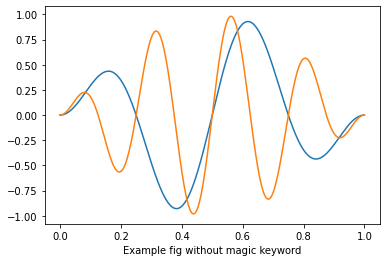

In [6]:
x = np.linspace(0, 1, 300)

for w in range(2, 6, 2):
    plt.plot(x, np.sin(np.pi*x)*np.sin(2*w*np.pi*x))
plt.xlabel('Example fig without magic keyword')
plt.show()

**Tip:** On higher resolution screens such as Retina displays, the default images in notebooks can look blurry.<br>Use `%config InlineBackend.figure_format = 'retina'` after `%matplotlib inline` to render higher resolution images.

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

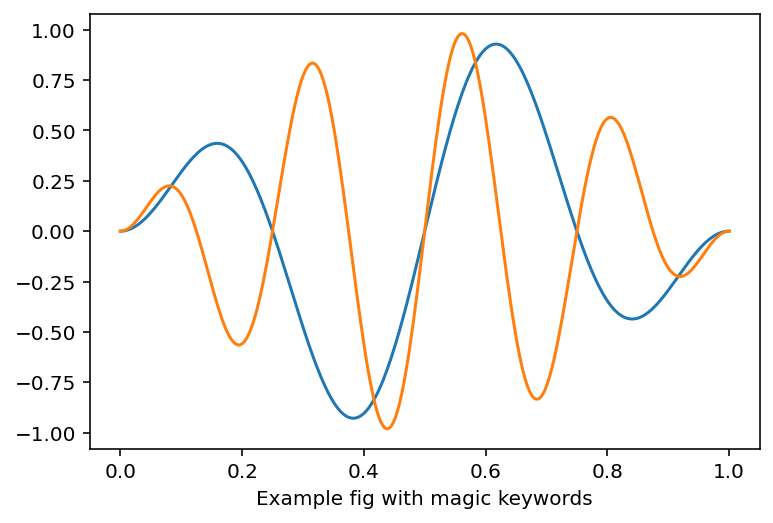

In [8]:
x = np.linspace(0, 1, 300)

for w in range(2, 6, 2):
    plt.plot(x, np.sin(np.pi*x)*np.sin(2*w*np.pi*x))
plt.xlabel('Example fig with magic keywords')
plt.show()

### Debugging in the Notebook
With the Python kernel, you can turn on the interactive debugger using the magic command `%pdb`. When you cause an error, you'll be able to inspect the variables in the current namespace.

In [9]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
var = 'hello'
sum(var)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

> <ipython-input-10-a88e3fa3552a>(2)<module>()
      1 var = 'hello'
----> 2 sum(var)

ipdb> q


Above you can see trying to sum up a string gives an error. The debugger raises the error and provides a prompt for inspecting the code.

Read more about pdb in the [documentation](https://docs.python.org/3/library/pdb.html). To quit the debugger, simply enter q in the prompt.